In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# TEST GROUND

In [2]:
def generateGraph(v):
    
    matrix = np.zeros((v,v)).astype(int)
    
    for i in range(v):
        j = i + 1
        for j in range(v):
            edge_exist = random.randint(0,1)
            if edge_exist and i != j:
                dist = random.randint(1,10)
                matrix[i,j] = dist
                matrix[j,i] = dist
    
    print("matrix:")
    print(matrix)
    print(" ")
    
    return matrix

In [3]:
# TEST
graph = generateGraph(5);

matrix:
[[ 0  9  8  0  7]
 [ 9  0 10 10  4]
 [ 8 10  0  1  4]
 [ 0 10  1  0  9]
 [ 7  4  4  9  0]]
 


In [4]:
def dijkstra(matrix, source):
    
    v = len(matrix)
    dist_from_source = np.ones(v) * np.inf
    pi = np.zeros(v).astype(int)
    S = np.zeros(v).astype(int)
    
    dist_from_source[source - 1] = 0
    
    print("Number of Vertices:", v)
    print("dist_from_source:", dist_from_source)
    print("Predecessor:", pi)
    print("Visited:", S)
    
    Q = np.arange(1, v+1) 
    Q = priorityQueue(Q, dist_from_source)

    print(" ")
    
    comparisons = 0
    
    while(len(Q) != 0):
        
        print("New round, length of Q:", len(Q))
        u, Q = extractCheapest(Q)
        print("Cheapest:", u)
        S[u - 1] = 1
        print("Visited:", S)
        print("Extracted u:", u)
        print("Remaining Q:", Q)
        
        adjacents = adjacent(matrix, u)
        for v in adjacents:
            comparisons += 1
            print("Current adjacent:", v)
            print("Known distance from source:", dist_from_source[v - 1])
            print("New distance from source:", dist_from_source[u - 1] + matrix[v - 1][u - 1])
            if S[v - 1] != 1 and (dist_from_source[v - 1] > dist_from_source[u - 1] + matrix[v - 1][u - 1]).any():
                dist_from_source[v - 1] = dist_from_source[u - 1] + matrix[v - 1][u - 1]
                pi[v - 1] = u
                print("pi:", pi)
                print("dist_from_source:", dist_from_source)
                Q = priorityQueue(Q, dist_from_source)
        
        print("pi:", pi)
        print(" ")
        
    return pi, comparisons

In [5]:
def printSolution(pi):
    
    vertex = 1
    for each in pi:
        print(vertex, ":", each)
        vertex += 1
        

In [6]:
def priorityQueue(queue, dist_from_source):
    
    v = len(dist_from_source)
    
    i = 0
    res_dist = []
    for each in queue:
        res_dist.append(dist_from_source[each - 1])
        i += 1
    
    i = 0
    for i in range(len(queue)):
        dist = res_dist[i]
        vertice = queue[i]
        j = i - 1;
 
        while j >= 0 and (res_dist[j] > dist).all():
            res_dist[j + 1] = res_dist[j]
            queue[j + 1] = queue[j]
            j -= 1

        res_dist[j + 1] = dist
        queue[j + 1] = vertice
        
    print("Queue:", queue)
        
    return queue

In [7]:
# TEST
v = 5
dist_from_source = np.ones(v) * np.inf
dist_from_source[4] = 0
print(dist_from_source)
queue = [1,2,3,4,5]
queue = priorityQueue(queue, dist_from_source)
print(queue)
print(type(queue))

[inf inf inf inf  0.]
Queue: [5, 1, 2, 3, 4]
[5, 1, 2, 3, 4]
<class 'list'>


In [8]:
def adjacent(matrix, vertice):
    
    adjacents = []
    
    for i in range(len(matrix)):
        if matrix[vertice - 1][i] != 0 and i != vertice - 1:
            adjacents.append(i+1)
            
    print("adjacents:", adjacents)
            
    return adjacents

In [9]:
# TEST
adjacent(graph,1)

adjacents: [2, 3, 5]


[2, 3, 5]

In [10]:
def remove(queue, vertice):
    
    np.delete(queue,vertice)

In [11]:
def extractCheapest(queue):
    
    element = queue[0]
    queue = np.delete(queue, 0)
    
    return element, queue

In [12]:
# TEST
queue = np.arange(1, v+1)
print(extractCheapest(queue))

(1, array([2, 3, 4, 5]))


In [13]:
if __name__ == "__main__":
    

    print("========== start ==========")
    
    size = 5
    source = 1

    graph = generateGraph(size)
    
    comparisons = 0
    
    x, comparisons = dijkstra(graph, source)
    
    print("comparisons", comparisons)
    printSolution(x)
    
    print("=========== end ===========")

========== start ==========
matrix:
[[ 0  5  2  9  3]
 [ 5  0  4  4  0]
 [ 2  4  0  5 10]
 [ 9  4  5  0  9]
 [ 3  0 10  9  0]]
 
Number of Vertices: 5
dist_from_source: [ 0. inf inf inf inf]
Predecessor: [0 0 0 0 0]
Visited: [0 0 0 0 0]
Queue: [1 2 3 4 5]
 
New round, length of Q: 5
Cheapest: 1
Visited: [1 0 0 0 0]
Extracted u: 1
Remaining Q: [2 3 4 5]
adjacents: [2, 3, 4, 5]
Current adjacent: 2
Known distance from source: inf
New distance from source: 5.0
pi: [0 1 0 0 0]
dist_from_source: [ 0.  5. inf inf inf]
Queue: [2 3 4 5]
Current adjacent: 3
Known distance from source: inf
New distance from source: 2.0
pi: [0 1 1 0 0]
dist_from_source: [ 0.  5.  2. inf inf]
Queue: [3 2 4 5]
Current adjacent: 4
Known distance from source: inf
New distance from source: 9.0
pi: [0 1 1 1 0]
dist_from_source: [ 0.  5.  2.  9. inf]
Queue: [3 2 4 5]
Current adjacent: 5
Known distance from source: inf
New distance from source: 3.0
pi: [0 1 1 1 1]
dist_from_source: [0. 5. 2. 9. 3.]
Queue: [3 5 2 4]
pi: [0

# CLEANED UP

In [14]:
def generateGraph(v):
    
    matrix = np.zeros((v,v)).astype(int)
    
    for i in range(v):
        j = i + 1
        for j in range(v):
            edge_exist = random.randint(0,1)
            if edge_exist and i != j:
                dist = random.randint(1,10)
                matrix[i,j] = dist
                matrix[j,i] = dist
                
    return matrix

In [15]:
def dijkstra(matrix, source):
    
    v = len(matrix)
    dist_from_source = np.ones(v) * np.inf
    pi = np.zeros(v).astype(int)
    S = np.zeros(v).astype(int)
    
    dist_from_source[source - 1] = 0
    
    Q = np.arange(1, v+1) 
    Q = priorityQueue(Q, dist_from_source)

    comparisons = 0
    
    while(len(Q) != 0):
        
        u, Q = extractCheapest(Q)
        S[u - 1] = 1
        
        adjacents = adjacent(matrix, u)
        for v in adjacents:
            comparisons += 1
            if S[v - 1] != 1 and (dist_from_source[v - 1] > dist_from_source[u - 1] + matrix[v - 1][u - 1]).any():
                dist_from_source[v - 1] = dist_from_source[u - 1] + matrix[v - 1][u - 1]
                pi[v - 1] = u
                Q = priorityQueue(Q, dist_from_source)
        
    return pi, comparisons

In [16]:
def priorityQueue(queue, dist_from_source):
    
    v = len(dist_from_source)
    
    i = 0
    res_dist = []
    for each in queue:
        res_dist.append(dist_from_source[each - 1])
        i += 1
    
    i = 0
    for i in range(len(queue)):
        dist = res_dist[i]
        vertice = queue[i]
        j = i - 1;
 
        while j >= 0 and (res_dist[j] > dist).all():
            res_dist[j + 1] = res_dist[j]
            queue[j + 1] = queue[j]
            j -= 1

        res_dist[j + 1] = dist
        queue[j + 1] = vertice
        
    return queue

In [17]:
def adjacent(matrix, vertice):
    
    adjacents = []
    
    for i in range(len(matrix)):
        if matrix[vertice - 1][i] != 0 and i != vertice - 1:
            adjacents.append(i+1)
    return adjacents

In [18]:
def extractCheapest(queue):
    
    element = queue[0]
    queue = np.delete(queue, 0)
    
    return element, queue

In [19]:
if __name__ == "__main__":
    

    print("========== start ==========")
    
    sizes = np.arange(1,100,5)
    comparisons_array = []
    
    for size in sizes:
        source = 1
        graph = generateGraph(size)
        x, comparisons = dijkstra(graph, source)
        comparisons_array.append(comparisons)
    
    print("=========== end ===========")

========== start ==========
=========== end ===========


Text(0.5, 1.0, 'Key Comparisons against Array Size')

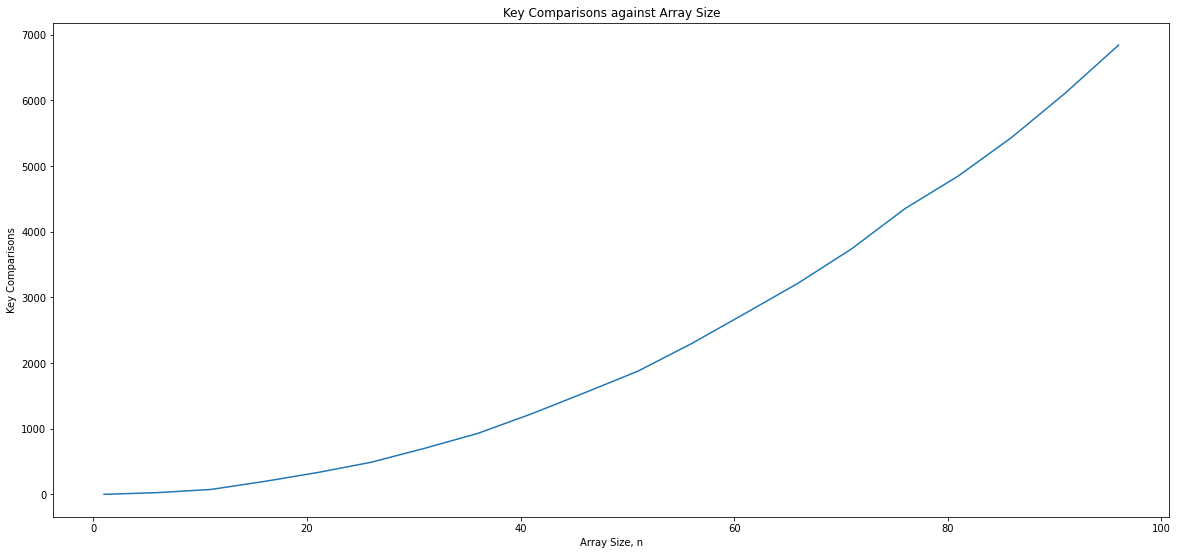

In [20]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(sizes, comparisons_array)
# ax.plot(sizes, theorectical_comparisons)
ax.set_xlabel("Array Size, n")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons against Array Size")